# Imbalanced Dataset
## Random under sampling 
we will reduce the majority of the class so that it will have same number of as the minority
## Random Over Sampling
we will increase the size of manority is inactive class to the size of majority ie active

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv(r"E:\subscription_purchase_data.csv")
dataset.head()

,Age,Salary,Purchased
0,56,72662,1
1,46,118506,1
2,32,32688,0
3,60,45342,1
4,25,57157,0


In [3]:
dataset['Purchased'].value_counts()

Purchased
1    105
0     95
Name: count, dtype: int64

In [4]:
dataset = pd.read_csv('E:\\imbalanced_dataset.csv')
dataset.head()

,age,salary,purchased
0,56,24000,0
1,46,90588,1
2,32,121042,1
3,60,113610,0
4,25,140420,0


In [5]:
dataset['purchased'].value_counts()

purchased
0    357
1    143
Name: count, dtype: int64

In [6]:
x = dataset.iloc[:, :-1]
y = dataset['purchased']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [12]:
lr.score(x_test, y_test)*100

67.0

In [14]:
lr.predict([[32	,121042]])

E:\Anaconda Installed\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [15]:
lr.predict([[46	,90588]])

E:\Anaconda Installed\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

> Hence the data is now baised now to balance this data we need to use imbalancing techineque

In [17]:
import imblearn.under_sampling import RandomUnderSampler

SyntaxError: invalid syntax (1041090859.py, line 1)

In [18]:
!pip install imblearn

In [19]:
from imblearn.under_sampling import RandomUnderSampler

In [20]:
rus = RandomUnderSampler()

In [21]:
rus.fit(x, y)

RandomUnderSampler()

In [23]:
rus_x, rus_y=rus.fit_resample(x, y)

In [24]:
rus_x

,age,salary
421,52,90390
162,39,46432
341,54,70612
384,53,57626
151,54,108858
...,...,...
489,41,128464
490,33,148077
491,19,111865
494,44,43624


In [25]:
rus_y

421    0
162    0
341    0
384    0
151    0
      ..
489    1
490    1
491    1
494    1
497    1
Name: purchased, Length: 286, dtype: int64

In [26]:
rus_y.value_counts()

purchased
0    143
1    143
Name: count, dtype: int64

In [27]:
x_train, x_test, y_train, y_test = train_test_split(rus_x, rus_y, random_state=42, test_size=0.2 )

In [28]:
lr.fit(x_train, y_train)

LogisticRegression()

In [30]:
lr.score(x_test, y_test)*100

50.0

In [31]:
lr.predict([[46	, 90588]])

E:\Anaconda Installed\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [33]:
lr.predict([[32,	121042]])

E:\Anaconda Installed\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [34]:
from imblearn.over_sampling import RandomOverSampler

In [43]:
ro = RandomOverSampler()

In [44]:
dataset = pd.read_csv("E:\\imbalanced_dataset.csv")

In [45]:
x = dataset.iloc[:, :-1]
y = dataset['purchased']

In [46]:
ro_x, ro_y = ro.fit_resample(x, y)

In [47]:
ro_y.value_counts()

purchased
0    357
1    357
Name: count, dtype: int64

In [48]:
x_train, x_test, y_train, y_test = train_test_split(ro_x, ro_y, test_size=0.2, random_state=42)

In [49]:
lr.fit(x_train, y_train)

LogisticRegression()

In [50]:
lr.score(x_test, y_test)*100

46.85314685314685

# Naive Bayes Algorithm
There are three types of Naive Bayes Model
1. Gaussian (Normal Distribution)
2. Multinomial (textual data)
3. Bernouli (Bolean data onehotencoding)
## Naive Bays algorithm Practical


In [51]:
dataset = pd.read_csv(r"E:\data_analysis_200_rows.csv")
dataset.head()

,CGPA,Placement Score,Placement Status
0,6.87,78.52,0
1,9.75,45.05,1
2,8.66,49.70,0
3,7.99,93.91,0
4,5.78,76.39,1


In [57]:
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
import matplotlib.pyplot as plt

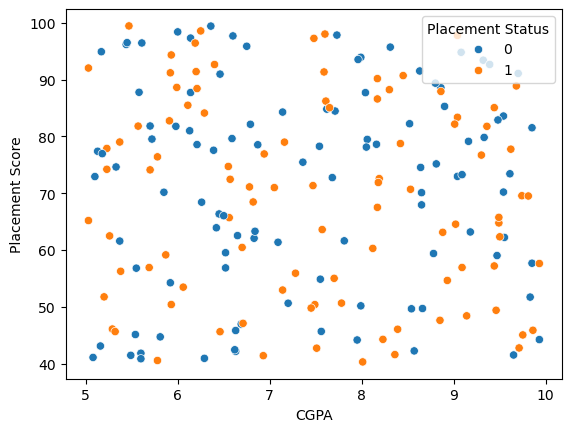

In [58]:
sns.scatterplot(x='CGPA', y='Placement Score', data=dataset, hue = 'Placement Status')
plt.show()

In [59]:
x = dataset.iloc[:, :-1]
y = dataset['Placement Status']

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

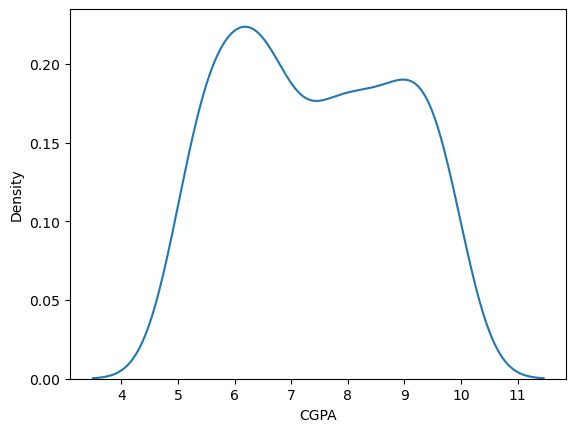

In [61]:
sns.kdeplot(data=dataset['CGPA'])
plt.show()

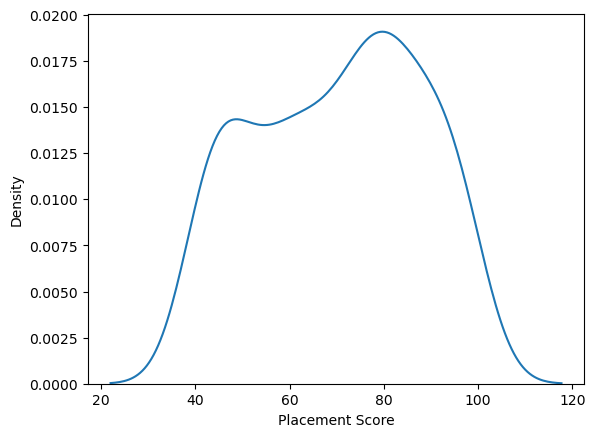

In [62]:
sns.kdeplot(data=dataset['Placement Score'])
plt.show()

In [63]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [64]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [65]:
gnb.score(x_test, y_test)*100

52.5

In [66]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [67]:
mnb.score(x_test, y_test)*100

50.0

In [68]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

BernoulliNB()

In [69]:
bnb.score(x_test, y_test)*100

60.0

E:\Anaconda Installed\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


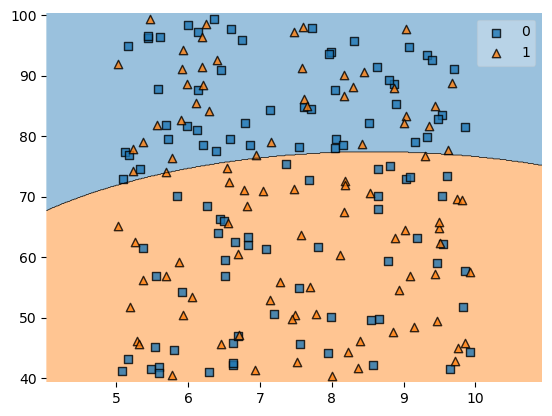

In [71]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf= gnb)
plt.show()

E:\Anaconda Installed\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


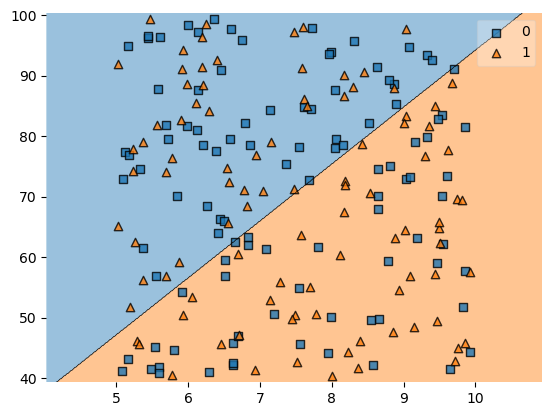

In [72]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf= mnb)
plt.show()

E:\Anaconda Installed\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


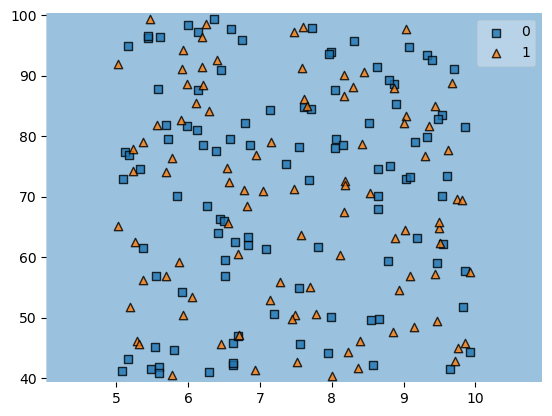

In [73]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf= bnb)
plt.show()